In [51]:
import sys
from pathlib import Path
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.hierarchical_clustering as cl
import ProbabilisticParcellation.similarity_colormap as cm
import Functional_Fusion.dataset as ds
import matplotlib.pyplot as plt
import ProbabilisticParcellation.functional_profiles as fp
import ProbabilisticParcellation.util as ut
import nitools as nt
import pandas as pd
import seaborn as sb
import numpy as np


# Import Dash dependencies
base_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
if not Path(base_dir).exists():
    base_dir = '/Users/callithrix/Documents/Projects/Functional_Fusion/'
if not Path(base_dir).exists():
    raise (NameError('Could not find base_dir'))
    

In [72]:
atlas = 'MNISymC2'

# load model
mname = f'/Models_03/NettekovenSym32_space-{atlas}'
fileparts = mname.split('/')
split_mn = fileparts[-1].split('_')
info, model = ut.load_batch_best(mname)


# load labels and cmap
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              f'{fileparts[-1].split("_")[0]}.lut')
labels = labels[1:]

# load profile
profile = pd.read_csv(
    f'{ut.model_dir}/Atlases/Profiles/{fileparts[-1].split("_")[0]}_profile.tsv', sep="\t"
)

# Normalize profile
profile_mat = profile[labels].to_numpy()
profile_norm = profile_mat / \
    np.sqrt(np.sum(profile_mat**2, axis=1).reshape(-1, 1))

# Get correlation of normalized profile between all regions
# Average the two sides
profile_sim = profile_norm[:, :model.K // 2] + profile_norm[:, model.K // 2:]
functional_sim_norm = profile_sim.T @ profile_sim



In [75]:
# Get similarity matrices
l, functional_sim, spatial_sim, ind = cl.similarity_matrices(mname)

In [70]:
# Make diagonal into zeros
np.fill_diagonal(functional_sim, 0)
np.fill_diagonal(functional_sim_norm, 0)
np.fill_diagonal(spatial_sim, 0)

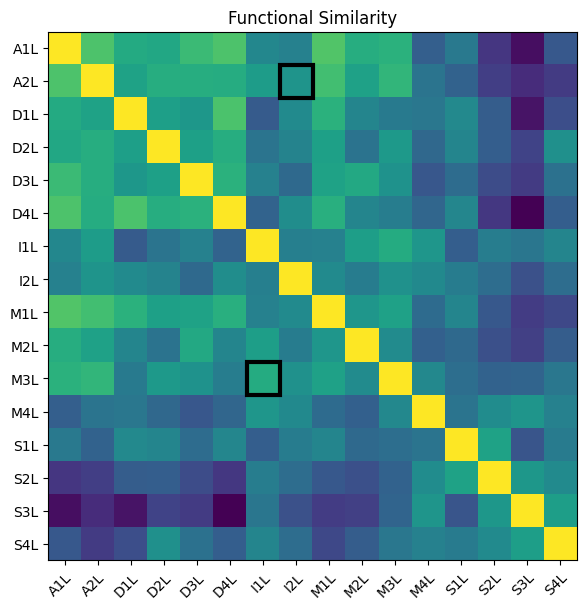

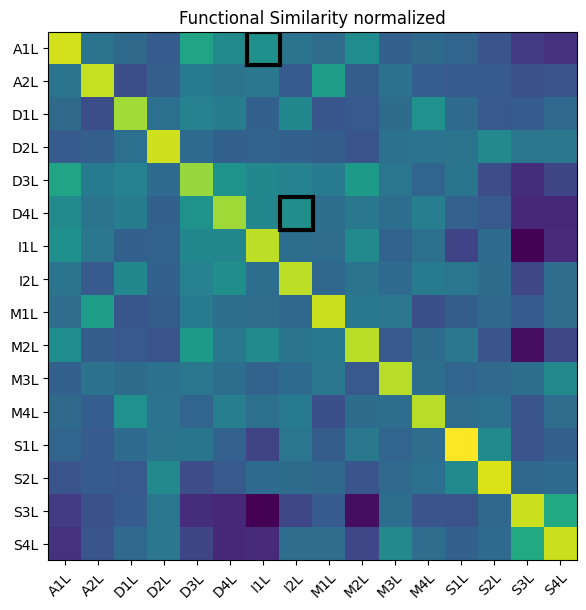

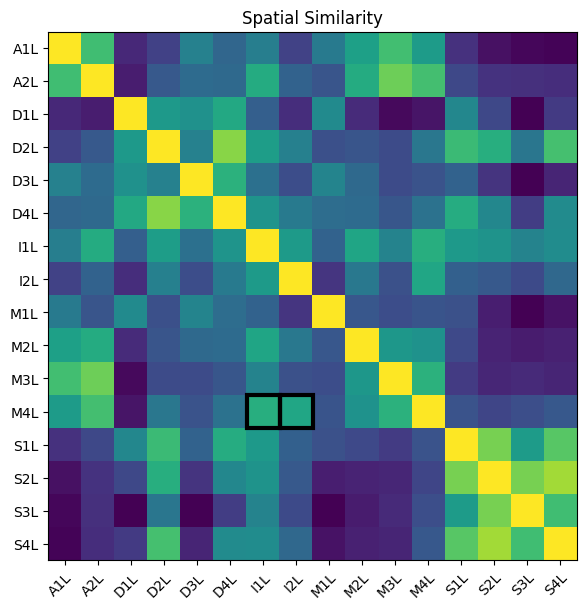

In [93]:


plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 2, 1)
ax.imshow(functional_sim)
ax.set_title('Functional Similarity')
ax.set_xticks(np.arange(len(l)))
ax.set_yticks(np.arange(len(l)))
ax.set_xticklabels(l)
_ = ax.set_yticklabels(l)
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Mark most similar region
idx_i1 = l.tolist().index('I1L')
idx_i2 = l.tolist().index('I2L')
max_indices_I1 = np.argsort(functional_sim[:, idx_i1])[::-1][1]
max_indices_I2 = np.argsort(
    functional_sim[:, idx_i2])[::-1][1]
ax = plt.gca()
ax.add_patch(plt.Rectangle((idx_i1 - .5, max_indices_I1 - .5), 1, 1,
                            fill=False, edgecolor='black', lw=3))
ax.add_patch(plt.Rectangle((idx_i2 - .5, max_indices_I2 - .5), 1, 1,
                            fill=False, edgecolor='black', lw=3))


# Show normalized matrix
plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 2, 1)
ax.imshow(functional_sim_norm)
ax.set_title('Functional Similarity normalized')
ax.set_xticks(np.arange(len(l)))
ax.set_yticks(np.arange(len(l)))
ax.set_xticklabels(l)
_ = ax.set_yticklabels(l)
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Mark most similar region
max_indices_I1 = np.argsort(
    functional_sim_norm[:, idx_i1])[::-1][1]
max_indices_I2 = np.argsort(
    functional_sim_norm[:, idx_i2])[::-1][1]
ax = plt.gca()
ax.add_patch(plt.Rectangle((idx_i1 - .5, max_indices_I1 - .5), 1, 1,
                           fill=False, edgecolor='black', lw=3))
ax.add_patch(plt.Rectangle((idx_i2 - .5, max_indices_I2 - .5), 1, 1,
                           fill=False, edgecolor='black', lw=3))


plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 2, 1)
ax.imshow(spatial_sim)
ax.set_title('Spatial Similarity')
ax.set_xticks(np.arange(len(l)))
ax.set_yticks(np.arange(len(l)))
ax.set_xticklabels(l)
_ = ax.set_yticklabels(l)
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

# Mark most similar region
max_indices_I1 = np.argsort(
    spatial_sim[:, idx_i1])[::-1][1]
max_indices_I2 = np.argsort(
    spatial_sim[:, idx_i2])[::-1][1]
ax = plt.gca()
ax.add_patch(plt.Rectangle((idx_i1 - .5, max_indices_I1 - .5), 1, 1,
                           fill=False, edgecolor='black', lw=3))
ax.add_patch(plt.Rectangle((idx_i2 - .5, max_indices_I2 - .5), 1, 1,
                           fill=False, edgecolor='black', lw=3))


## Explore functional profiles in I1-I2 regions in the MDTB dataset

In [2]:
D = pd.read_csv(base_dir + 'Profiles/' +
                'NettekovenSym32_profile_model.tsv', delimiter='\t')


In [15]:
networks = ['I', 'A', 'S']
regions = sorted([label for label in D.columns if label[0] in networks])
regions = sorted(regions, key=lambda x: networks.index(x[0]))

# Make colour codes into colours
reg_colors = ['red', 'orange', 'limegreen',
              'darkgreen', 'blue', 'purple', 'slateblue', 'darkviolet']
reg_colors = sb.color_palette(reg_colors, n_colors=len(regions))



In [29]:
T = D[D.dataset=='MDTB']
T = T[['condition'] + regions]
T= T.melt(id_vars='condition',var_name='region',value_name='Vvalue')
# Split region into side and region
T['side']=T.region.str[-1]
T['reg']=T.region.str[0:2]
T['net'] = T.region.str[0]
# Split condition into task, difficulty, and material   
T['task']=[x.split('-')[0] for x in T.condition]



<Figure size 1500x600 with 0 Axes>

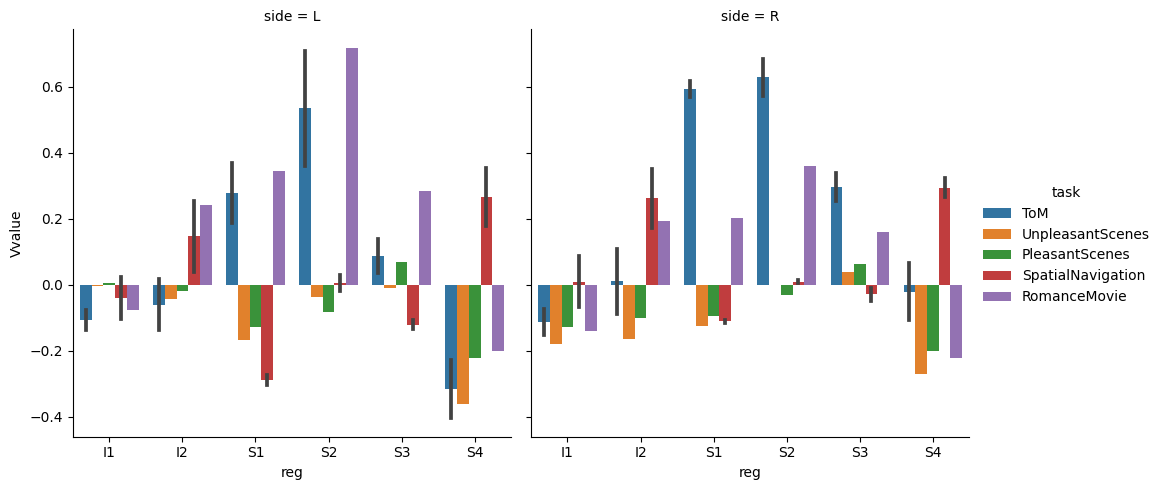

<Figure size 1500x600 with 0 Axes>

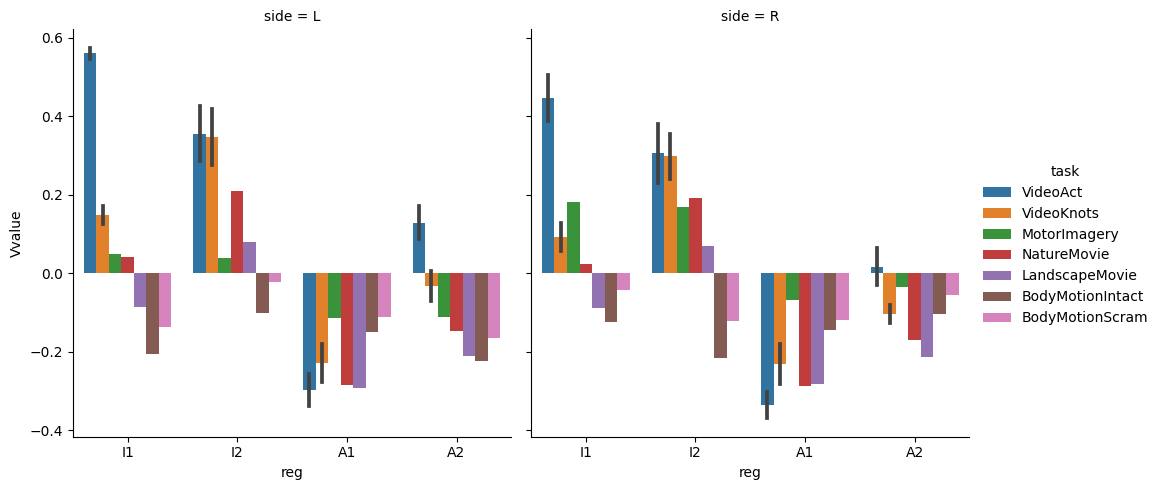

<Figure size 1500x600 with 0 Axes>

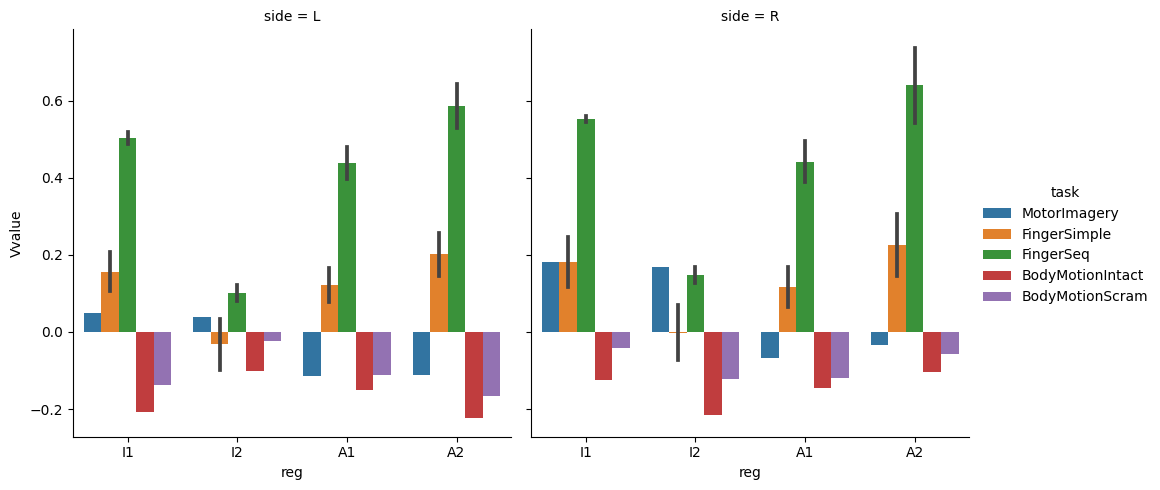

In [33]:

tasks_social = ['ToM', 'UnpleasantScenes',
                'PleasantScenes', 'SadFaces'
                'HappyFaces', 'SpatialNavigation', 'RomanceMovie']
tasks_action = ['VideoAct', 'VideoKnots', 'NatureMovie', 'LandscapeMovie',
                'BodyMotionIntact', 'BodyMotionScram']
# tasks_demand = ['Verbal0Back', 'Verbal2Back', 'Object0Back', 'Object2Back',
#                 'StroopIncon', 'StroopCon', 'VerbGen',
#                 'WordRead', 'VisualSearchSmall', 'VisualSearchMed',
#                 'VisualSearchLarge', 'CPRO']
tasks_motor = ['MotorImagery', 'FingerSeq','FingerSimple']

nets = ['I', 'S']
plt.figure(figsize=(15, 6))
sb.catplot(data=T[T.task.isin(tasks_social) & T.net.isin(nets)], kind='bar', col='side',
           x='reg', y='Vvalue', hue='task')

nets = ['I', 'A']
plt.figure(figsize=(15, 6))
sb.catplot(data=T[T.task.isin(tasks_action) & T.net.isin(nets)], kind='bar', col='side',
           x='reg', y='Vvalue', hue='task')

nets = ['I', 'A']
plt.figure(figsize=(15, 6))
sb.catplot(data=T[T.task.isin(tasks_motor) & T.net.isin(nets)], kind='bar', col='side',
           x='reg', y='Vvalue', hue='task')


## Compare I regions with A and S regions

### Region I1

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/3911699043.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/3911699043.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()


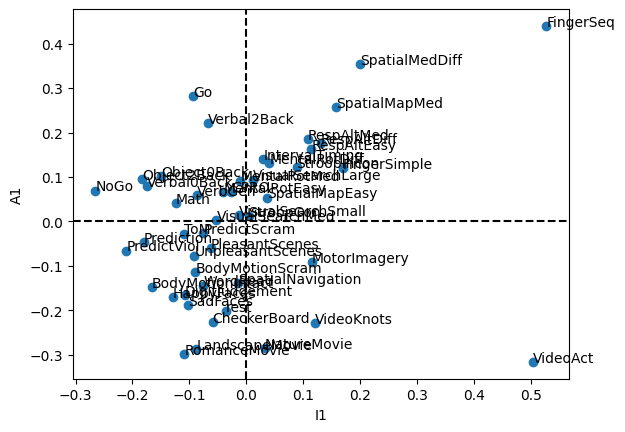

In [98]:
# Annotated correlation plots
compare = ['I1', 'A1']
region1 = T[T.reg == compare[0]]
region2 = T[T.reg == compare[1]]
# Average within each task
region1 = region1.groupby(['task']).mean().reset_index()
region2 = region2.groupby(['task']).mean().reset_index()
plt.scatter(region1.Vvalue, region2.Vvalue)

# Add labels to the dots
for i in range(len(region1)):
    plt.annotate(f'{region1.iloc[i].task}',
                 (region1.iloc[i].Vvalue, region2.iloc[i].Vvalue))

# Label
plt.xlabel(compare[0])
plt.ylabel(compare[1])
# Insert lines
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')


### Region I2

/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/206646176.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/206646176.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()


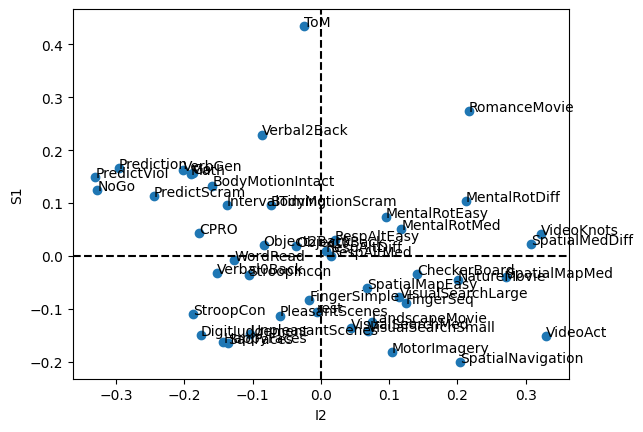

In [44]:
# Annotated correlation plots
compare = ['I2', 'S1']
region1 = T[T.reg == compare[0]]
region2 = T[T.reg == compare[1]]
# Average within each task
region1 = region1.groupby(['task']).mean().reset_index()
region2 = region2.groupby(['task']).mean().reset_index()
plt.scatter(region1.Vvalue, region2.Vvalue)

# Add labels to the dots
for i in range(len(region1)):
    plt.annotate(f'{region1.iloc[i].task}',
                 (region1.iloc[i].Vvalue, region2.iloc[i].Vvalue))

# Label
plt.xlabel(compare[0])
plt.ylabel(compare[1])
# Insert lines
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/2927316.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/2927316.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()


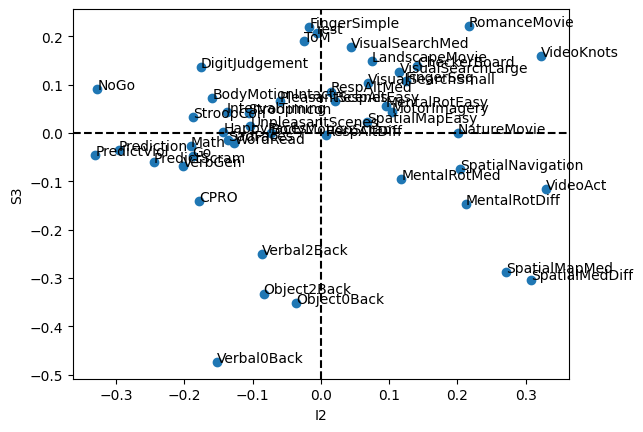

In [45]:
# Annotated correlation plots
compare = ['I2', 'S3']
region1 = T[T.reg == compare[0]]
region2 = T[T.reg == compare[1]]
# Average within each task
region1 = region1.groupby(['task']).mean().reset_index()
region2 = region2.groupby(['task']).mean().reset_index()
plt.scatter(region1.Vvalue, region2.Vvalue)

# Add labels to the dots
for i in range(len(region1)):
    plt.annotate(f'{region1.iloc[i].task}',
                 (region1.iloc[i].Vvalue, region2.iloc[i].Vvalue))

# Label
plt.xlabel(compare[0])
plt.ylabel(compare[1])
# Insert lines
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/1105586826.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region1 = region1.groupby(['task']).mean().reset_index()
/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_53505/1105586826.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region2 = region2.groupby(['task']).mean().reset_index()


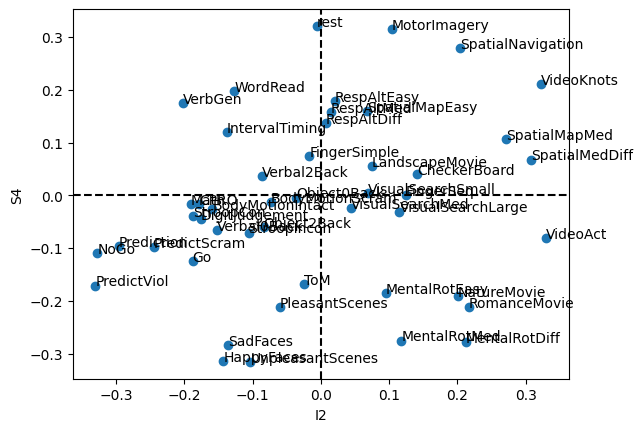

In [40]:
# Annotated correlation plots
compare = ['I2', 'S4']
region1 = T[T.reg == compare[0]]
region2 = T[T.reg == compare[1]]
# Average within each task
region1 = region1.groupby(['task']).mean().reset_index()
region2 = region2.groupby(['task']).mean().reset_index()
plt.scatter(region1.Vvalue, region2.Vvalue)

# Add labels to the dots
for i in range(len(region1)):
    plt.annotate(f'{region1.iloc[i].task}',
                 (region1.iloc[i].Vvalue, region2.iloc[i].Vvalue))

# Label
plt.xlabel(compare[0])
plt.ylabel(compare[1])
# Insert lines
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')


## Contrast regions across all tasks

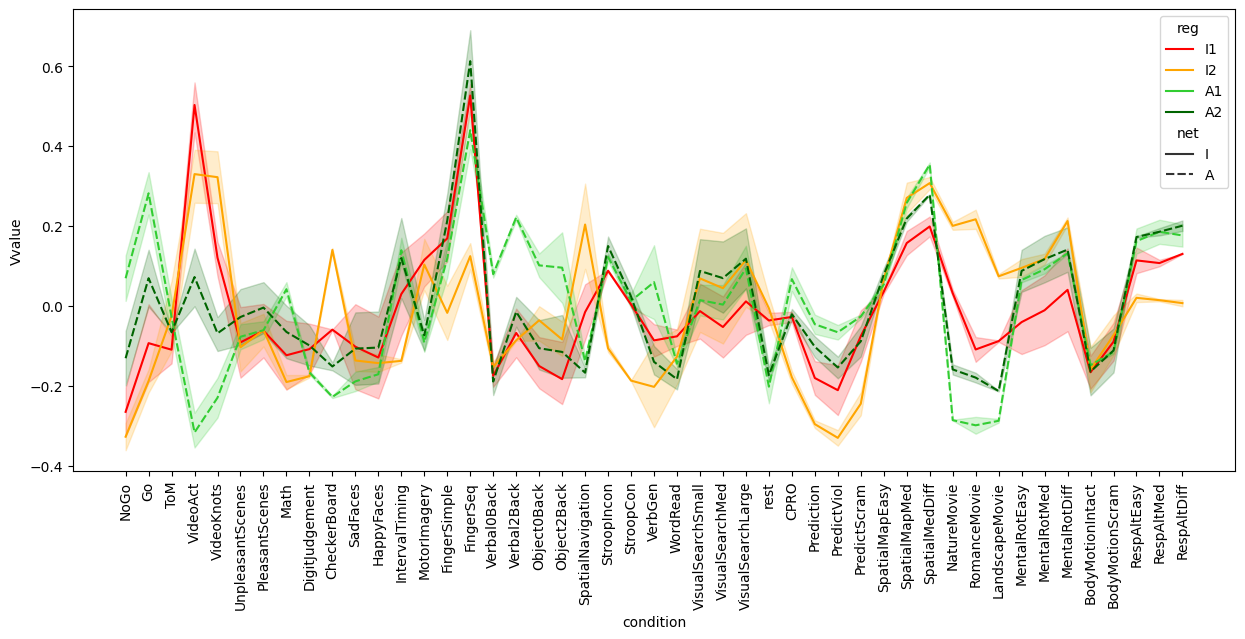

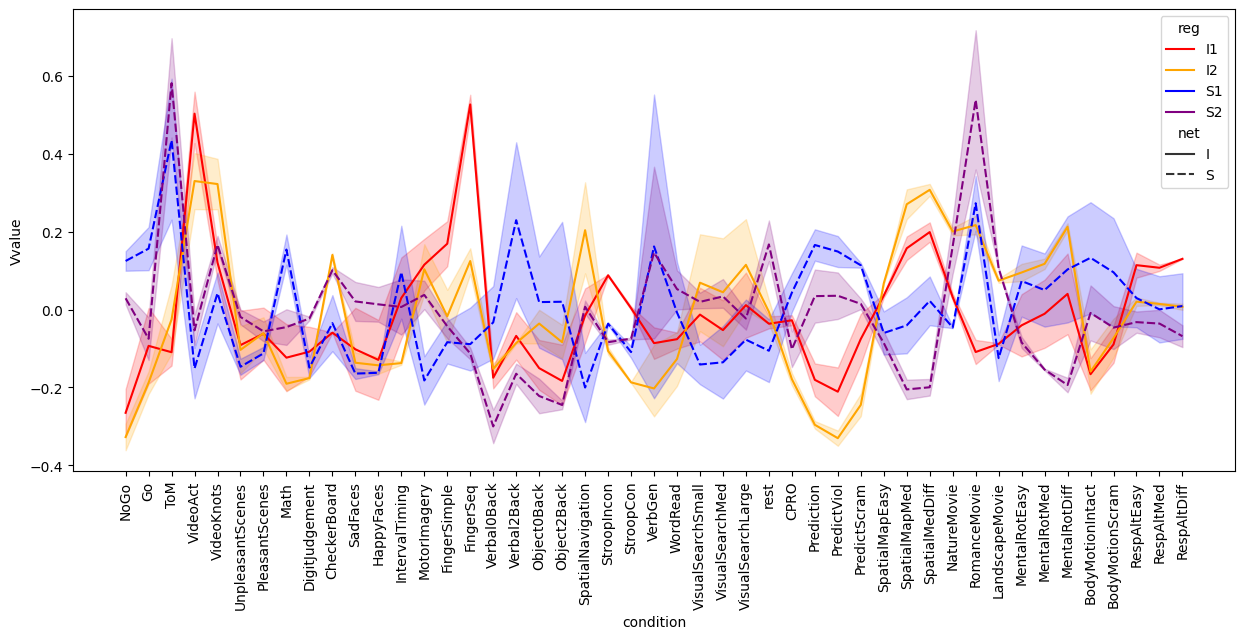

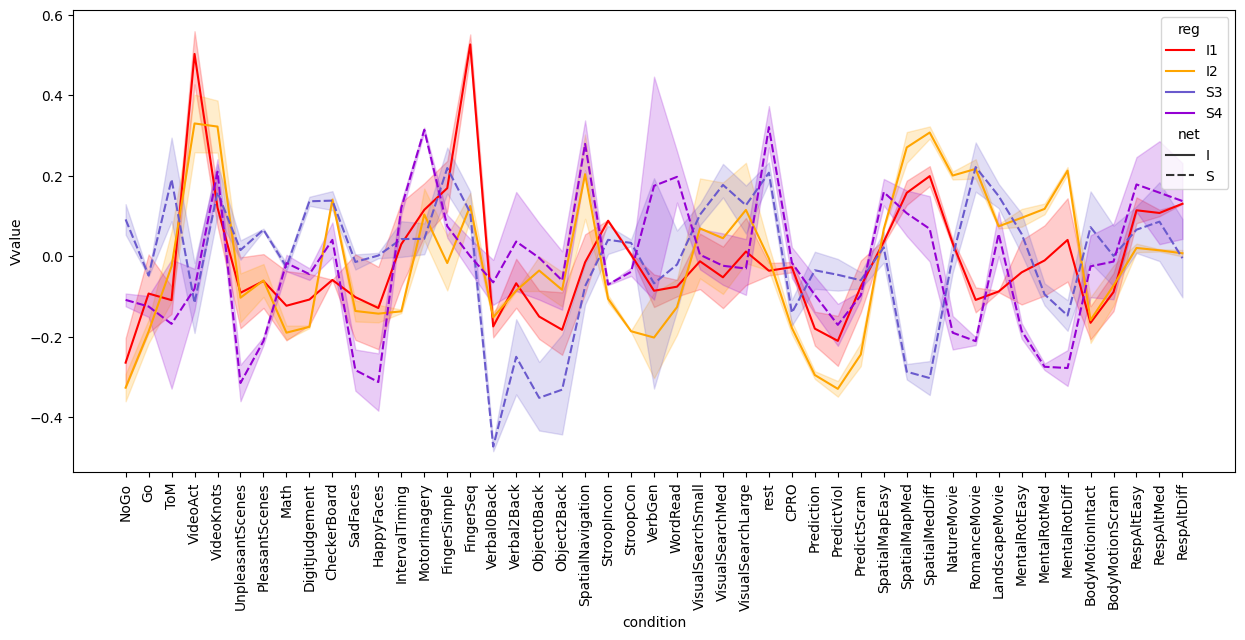

In [17]:
contrast_regions = ['I1', 'I2', 'A1', 'A2']
selected_colors = [color for region, color in zip(
    regions[::2], reg_colors) if region[:2] in contrast_regions]
plt.figure(figsize=(15, 6))
sb.lineplot(data=T[T.reg.isin(contrast_regions)], x='condition', y='Vvalue', hue='reg',
            palette=selected_colors, hue_order=contrast_regions, style='net')
xt = plt.xticks(rotation=90)


contrast_regions = ['I1', 'I2', 'S1', 'S2']
selected_colors = [color for region, color in zip(
    regions[::2], reg_colors) if region[:2] in contrast_regions]
plt.figure(figsize=(15,6))
sb.lineplot(data=T[T.reg.isin(contrast_regions)], x='condition', y='Vvalue', hue='reg',
            palette=selected_colors, hue_order=contrast_regions, style='net')
xt=plt.xticks(rotation=90)

contrast_regions = ['I1', 'I2', 'S3', 'S4']
selected_colors = [color for region, color in zip(
    regions[::2], reg_colors) if region[:2] in contrast_regions]
plt.figure(figsize=(15,6))
sb.lineplot(data=T[T.reg.isin(contrast_regions)], x='condition', y='Vvalue', hue='reg',
            palette=selected_colors, hue_order=contrast_regions, style='net')
xt=plt.xticks(rotation=90)